#**STOCK PRICE PREDICTION USING MACHINE LEARNING**

##**1. Overview:**

The Project focuses on creating a model that uses the price of Amazon (AMZN) stocks over the 10 year time period from 2013 to 2023 to predict the future expected price of Amazon Stocks in the USA Market. The model uses different machine learning tools to prepare the data, build model and communicate the results for decision making by investors.

##**2. Use of Machine Learning in trading:**

Machine is a branch of Artificial Intelligence that enables computers and systems to automatically learn from data and make decisions based on the pttern data, without being explicitly programmed. Machine Learning revolutionized the field of trading by providing advanced tools for data analysis, decision-making, and predictive modeling. It provides an edge over tradional statistical models.


The complexity and volume of financial data makes traditional statistical models limited in their ability to capture non-linear relaionships and interactions. On the contrary, Machine Learning has the ability to process large datasets, uncover complex patterns, and adapt to changing market conditions that are not easily obeserved by traditional statistical models.

***Some Reasons for use of Machine learning in Financial Trading:***

***1. Pattern Recognition:*** Machine learning helps in analyzing complex data generated in the financial market, such as price, trade volume, news, social media activities, etc.  ML models detect patterns and relationships in the data that are not easily detected by human traders. They also assist in exhibiting complex, non-linear relationships between variables.

***2. Automation of Trading Strategies:*** Machine learning models can automatically process large datasets, extract insights, and generate trading signals without the need for manual intervention.

***3. Prediction Accuracy:*** ML models, i.e Time series model, offer more accuracy in forcasting asset prices, volatility,and other financial metrics compared to traditional statistical models. It also assists in analyzing unstructured data like news, earnings reports, social media to predict price movements.

***4. Risk Management:*** Predictive analytics can be used to assess risks and manage portfolio exposure by forecasting market volatility, drawdowns, and potential losses.

##**3. Machine Learning Model for Predictive Analytics**

Predictive analytics uses machine learning (ML) models to make predictions about future events or trends based on historical data.

There are different types of ML models for predictive analytics. This project uses Linear Regression Model to predict the future price of AMazon stocks based on historical prices.

***Linear Regression Model:*** The simplest form of regression that models the relationship between the dependent variable (e.g., stock price) and independent variables (e.g., moving averages, momentum) as a linear function. It assumes that the relationship between the variables is a straight line.

##**4. Python code for Preparing Data for stock price prediction:**

**4.1 Step 1 - Import Data:**

In [ ]:
#Import Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import yfinance as yf
from datetime import datetime
from sklearn.linear_model import LinearRegression #Used to build the machine learning model
from sklearn.metrics import mean_absolute_error #used for evaluating the model

In [ ]:
#Import Historical Stock price of Amazon from Yahoo Finance for 10 years:

def get_historical_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end= end_date)
    return stock_data

In [ ]:
#Fetch data for AMZN Stock:
ticker= "AMZN"
start = "2013-01-01"
end = "2023-12-31"
stock_data= get_historical_data(ticker, start, end)

#Print the data in a data frame:
df_amzn=pd.DataFrame(stock_data)
df_amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000


In [ ]:
#Get adj close information about the data:

df_adj_close = df_amzn["Adj Close"]
df = pd.DataFrame(df_adj_close)
df.head()

,Adj Close
Date,
2013-01-02,12.8655
2013-01-03,12.9240
2013-01-04,12.9575
2013-01-07,13.4230
2013-01-08,13.3190


In [ ]:
#Describe the statistics of the data:

df.describe()

,Adj Close
count,2768.000000
mean,78.078527
std,52.929354
min,12.411500
25%,26.680125
50%,80.149502
75%,120.954998
max,186.570496


In [ ]:
#Check for missing values"

df.isna().sum() # Shows that data has no null values

,0
Adj Close,0


**4.2  Step 2- Explore Data:**

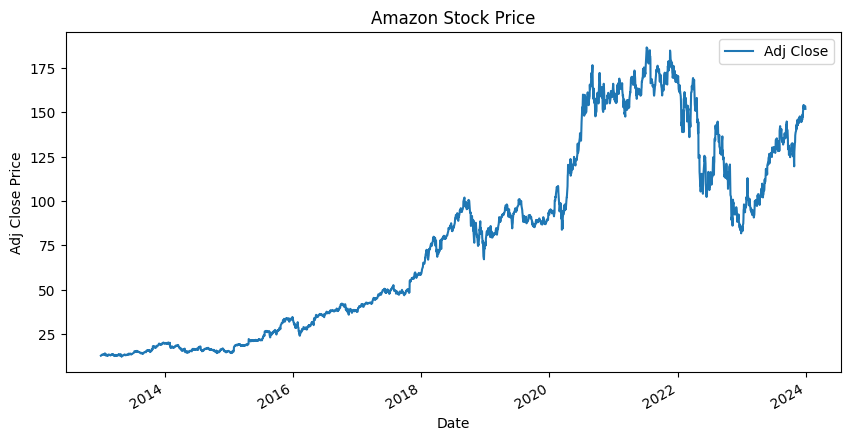

In [ ]:
#Plot the Adj close price of Amazon stock:
fig,ax =plt.subplots(figsize=(10,5))
df.plot(ax=ax)
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Amazon Stock Price")
plt.show()

***Figure:*** The line plot displays the fluctuations in the adjusted close price of Amazon Stocks for the 10 year period. It can be observed that Amazon's stock price peaked after 2020, reaching at its maximum price of 186 USD,  which again dropped 3 years later in 2023.

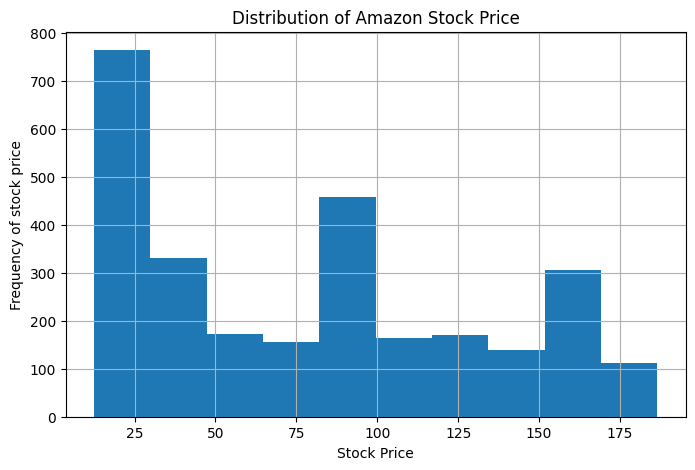

In [ ]:
 #Create histogram of the Adj close columns:

fig,ax=plt.subplots(figsize=(8,5))
df.hist(ax=ax)
plt.xlabel("Stock Price")
plt.ylabel("Frequency of stock price")
plt.title("Distribution of Amazon Stock Price")
plt.show()

***Figure:*** The histogram displays the frequency of price of the Amazon Stock. The most frequent price at which the stocks were traded ranges from 17 USd to approximately 30 USD, containing a frequency of more than 700 times.

**4.3) Step 3-  Split Data:**

In order to predict the future stock price of next day of Amazon stock, the project uses historical price of past 2 days.

- lag_1 - this is the stock past of past one day
- lag_2 - this represents the sotck price of past two days

In [ ]:
#Create Lag Feature
 #Split data for feature  matrix (Lagged closing price) and Target Vector( next days closing price) :

df["lag_1"]=df_amzn["Adj Close"].shift(1)
df["lag_2"]=df_amzn["Adj Close"].shift(2)
data = df.dropna()
data.head()

,Adj Close,lag_1,lag_2
Date,,,
2013-01-04,12.9575,12.9240,12.8655
2013-01-07,13.4230,12.9575,12.9240
2013-01-08,13.3190,13.4230,12.9575
2013-01-09,13.3175,13.3190,13.4230
2013-01-10,13.2670,13.3175,13.3190


In [ ]:
#Correlation between agged price and adjusted closing price:

data.corr()

,Adj Close,lag_1,lag_2
Adj Close,1.000000,0.999277,0.998592
lag_1,0.999277,1.000000,0.999277
lag_2,0.998592,0.999277,1.000000


In [ ]:
#Split data in to target matrix and feature matrix

y= data['Adj Close']# target_matrix
X= data[["lag_1","lag_2"]].dropna() #feature

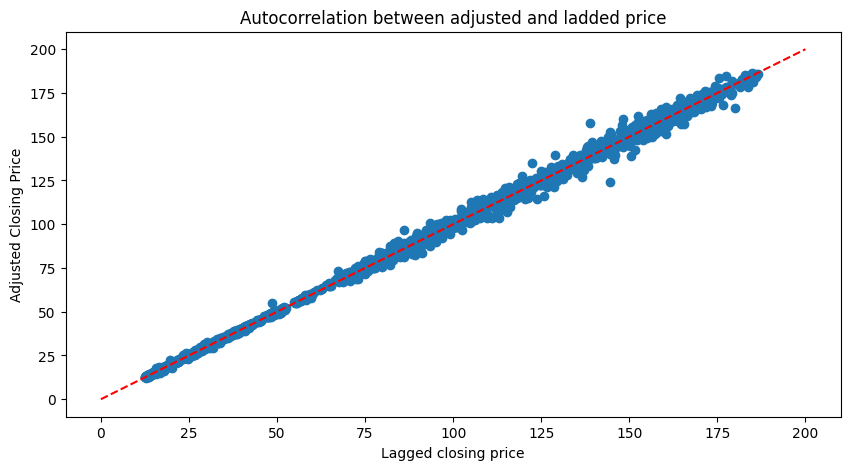

In [ ]:
#Scatter plot to show relation betweem adj close price and lagged price for lag_1

fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x= df["lag_1"],y= df_amzn["Adj Close"])
ax.plot([0,200],[0,200],color="red", linestyle="--") # a straight line with 45 degree andgle
plt.xlabel("Lagged closing price")
plt.ylabel("Adjusted Closing Price")
plt.title("Autocorrelation between adjusted and ladded price")
plt.show()

***Figure:*** The scatterpot displays that the adjusted close price and the lagged price of past one day, is highly coorelated, for which cause, it is close to the line.

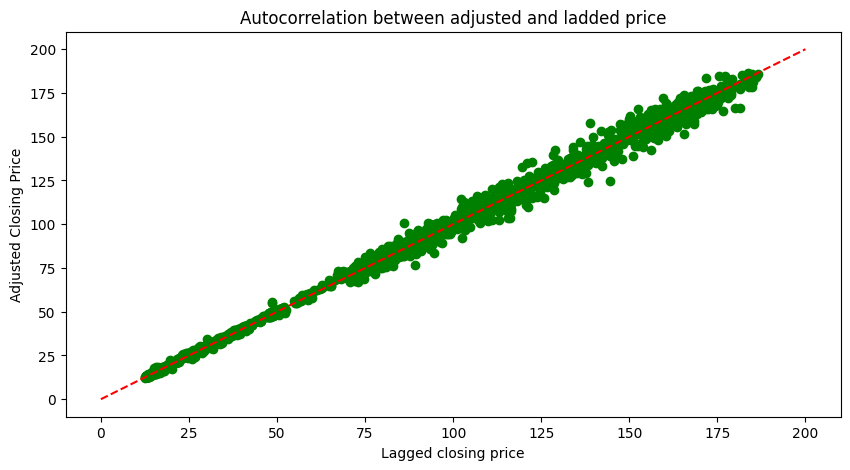

In [ ]:
#Scatter plot to show relation betweem adj close price and lagged price for lag_2

fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x= df["lag_2"],y= df_amzn["Adj Close"], color="g")
ax.plot([0,200],[0,200],color="red", linestyle="--") # a straight line with 45 degree andgle
plt.xlabel("Lagged closing price")
plt.ylabel("Adjusted Closing Price")
plt.title("Autocorrelation between adjusted and ladded price")
plt.show()

In [ ]:
#Train-Test Split:
 # Splitting data into training and testing sets ( 80% training data and 20% testing data)

train_size = int(len(data)*0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]   # 80% of the feature (X) data will be used for training the 20% of the test data
y_train, y_test = y.iloc[:train_size] , y.iloc[train_size:] # 80% of the target (y)  data will be used for training the 20% of the test data

##**5. Build the Model:**

**5.1 Create Baseline:**

To create the baseline, we calculate Mean Absolute Error:

The Mean Absolute Error (MAE) is a measure used in statistics and machine learning to assess the accuracy of a model in predicting continuous outcomes. It calculates the average of the absolute differences between the predicted values and the actual (true) values. In other words, MAE shows the magnitude of errors in a set of predictions, without considering their direction (whether the predictions are too high or too low).

MAE tells you the average size of the errors between predictions and actual values. A lower MAE indicates that the model’s predictions are closer to the actual outcomes.

In [ ]:
#Calculate baseline mean_absolute _error(mae):

from sklearn.metrics import mean_absolute_error

y_pred_baseline = [y_train.mean()]*len(y_train) #predicted value
y_mae_baseline=mean_absolute_error(y_train,y_pred_baseline)
print(f"Baseline Mean_absolute_error: {y_mae_baseline}")

Baseline Mean_absolute_error: 42.94332468599448


The mean absolute error is quiet low, which shows that the predicted value is closer to the actual outcomes.

**5.2 Instantiate Linear regreesion and fit the model:**

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**5.3 Evaluate Model:**

In [ ]:
_#Calculate the training and test mean absolute error for your model.

y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)

y_pred_test = model.predict(X_test)
mae_test= mean_absolute_error(y_test, y_pred_test)

print(f"Mean Absolute Error Training: {mae_training}")
print(f"Mean Absolute Error Test: {mae_test}")

Mean Absolute Error Training: 0.8645170697284709
Mean Absolute Error Test: 2.380555371715327


In [ ]:
df_pred_test = pd.DataFrame({
    "y_test": y_test,
    "y _pred": model.predict(X_test)})
df_pred_test.head()

,y_test,y _pred
Date,,
2021-10-18,172.337006,170.407538
2021-10-19,172.207504,172.390319
2021-10-20,170.753006,172.315079
2021-10-21,171.750504,170.895854
2021-10-22,166.777496,171.827583


In [ ]:
# Plotting actual vs predicted prices

fig = px.line(df_pred_test, labels ={"values":"Adj Close"},width = 1000, height= 500)
fig.show()

***Figure:*** the figure displays the predicted price of amazon stocks from January 2022 to October 2023, using the 10 year historical price of the stocks. It shows that the machinel earning model has trained the data, then tested the data using trained data, and then predicted the stock price for next two years.